In [51]:
import pandas as pd

In [52]:
df=pd.read_csv("/kaggle/input/dataset-adult-info/adult_1.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [53]:
df.shape

(48842, 15)

In [54]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [55]:
category=["workclass","education","marital-status","occupation","relationship","race","gender","native-country"]

In [56]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in category:
    df[col] = label.fit_transform(df[col])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,<=50K
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,<=50K
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,>50K
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,>50K
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,<=50K


In [57]:
df['income'] = df['income'].replace({'<=50K': 1, '>50K': 0})

In [58]:
df["income"].value_counts()

income
1    37155
0    11687
Name: count, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=["income"],axis=1)
y=df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision Tree Intuition

In [60]:
preds = []
for x,y in X_test.iterrows():
  workclass = y['workclass']
  relationship = y['relationship']
  if workclass == 4 and relationship == 0:
    
    preds.append(1)
  else:
    preds.append(0)

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

0.7368205548162555

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.2631794451837445

In [63]:
X.shape

(48842, 14)

In [64]:
from sklearn.tree import DecisionTreeClassifier
import numpy  as np
model_1 = DecisionTreeClassifier(random_state=42,max_depth=3,max_features=14)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=14, random_state=42)

In [65]:
predict=model_1.predict(X_test)
mean_absolute_error(y_test, predict)

0.15508240352134303

In [66]:
accuracy_score(y_test,predict)

0.8449175964786569

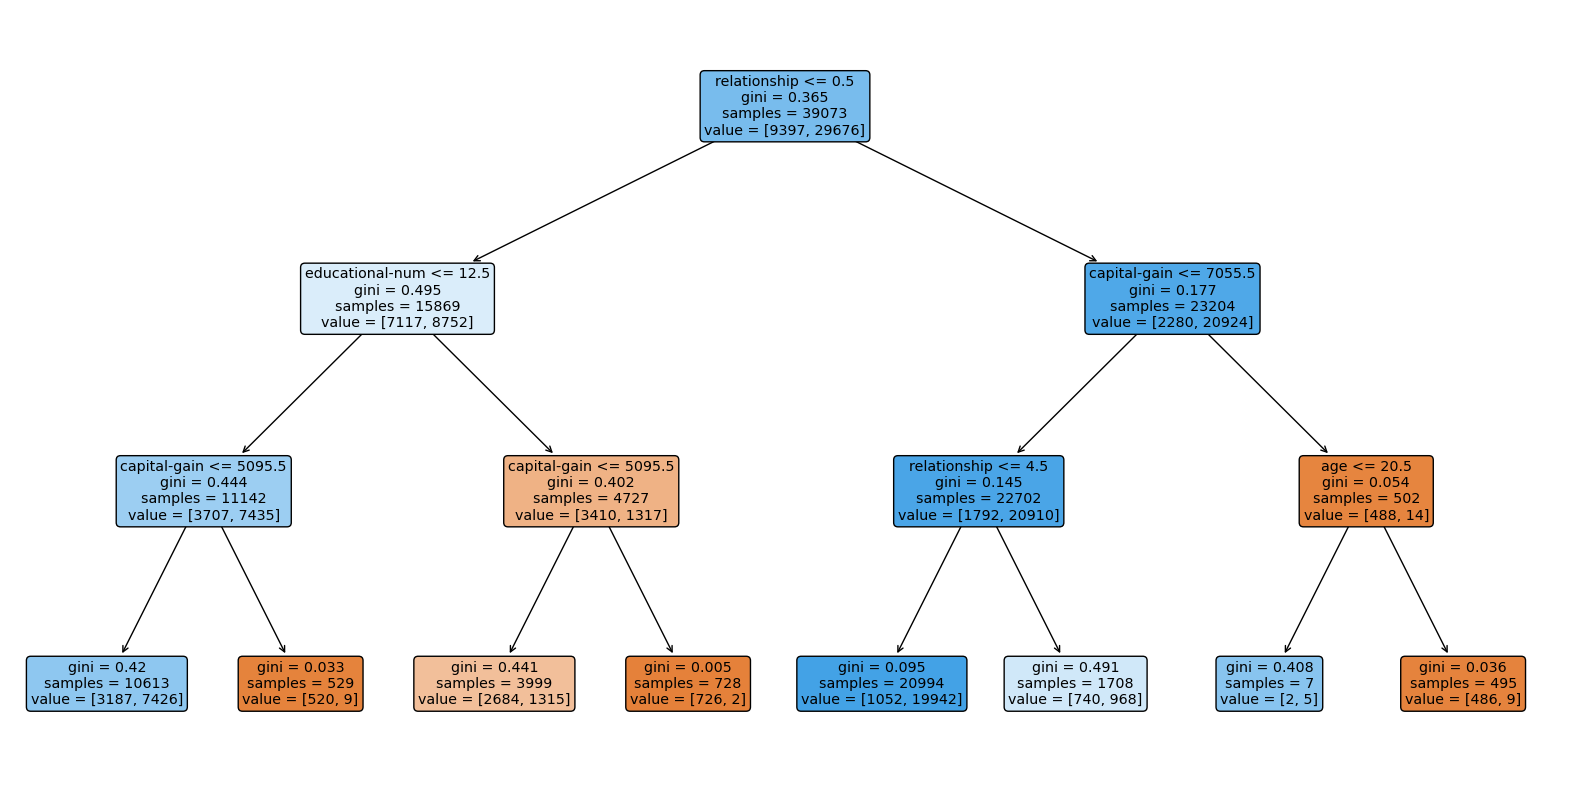

In [67]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model_1,feature_names=X.columns, rounded=True, filled=True)
plt.show()

# random forest

In [68]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def build_tree(X, y, proportion=0.8):
    total = X.shape[0]
    indices = np.random.choice(total, int(total * proportion))
    return DecisionTreeClassifier(min_samples_leaf=50).fit(X.iloc[indices], y.iloc[indices])



# Build 500 decision trees
random_decision_trees = [build_tree(X_train, y_train) for idx in range(500)]

all_probs = [dtc_model.predict(X_test) for dtc_model in random_decision_trees]

avg_probs = np.stack(all_probs).mean(0)

income_array = y_test

# Calculate mean absolute error
mae = mean_absolute_error(income_array, avg_probs)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.14460292762821167


In [69]:

ensemble_preds = np.array([np.argmax(np.bincount(pred)) for pred in np.array(all_probs).T])

# Calculate accuracy using scikit-learn's accuracy_score
accuracy = accuracy_score(y_test, ensemble_preds)

print("Accuracy:", accuracy)

Accuracy: 0.8673354488688709


In [70]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(n_estimators=500,min_samples_leaf=50)
model_2.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=500)

In [71]:
predict2=model_2.predict(X_test)
mean_absolute_error(y_test, predict2)

0.1352236667007882

In [72]:
accuracy_score(y_test,predict2)

0.8647763332992118